# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.manifold import TSNE

# Importing data

In [2]:
url='https://drive.google.com/file/d/1ib3Zm61vAGEaA8en8QIWG_ZMyqAzKYHe/view?usp=drive_link'
path='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_ascoli = pd.read_csv(path)

In [3]:
df_ascoli = df_ascoli.drop(columns=['Unnamed: 0'])

In [4]:
df_ascoli.head(5)

age_group                        gender       location  \
0     18-25                          Male  South America   
1     26-35                          Male         Europe   
2     18-25                        Female          Italy   
3     26-35  Other/I prefer not to say it  South America   
4     26-35                        Female          Italy   

                                      italian_region  travel_purpose  \
0                                                NaN         Tourism   
1                                                NaN         Tourism   
2  North (Valle d'Aosta, Piemonte, Lombardia, Lig...         Tourism   
3                                                NaN  I don’t travel   
4  North (Valle d'Aosta, Piemonte, Lombardia, Lig...       Education   

  touristic_travel_freq                    traveler_type  \
0                     1   Family Traveler;Group Traveler   
1                    >5                   Group Traveler   
2                     2                   Group Traveler   
3                     0                  Family Traveler   
4                     3  Family Traveler;Couple Traveler   

                                         trip_org  \
0  Relying on recommendations from friends/family   
1               I plan and book everything myself   
2               I plan and book everything myself   
3               I plan and book everything myself   
4  Relying on recommendations from friends/family   

                                   trip_ideas_source  \
0  Social media platforms (e.g., Instagram, TikTo...   
1  Social media platforms (e.g., Instagram, TikTo...   
2  Social media platforms (e.g., Instagram, TikTo...   
3  Social media platforms (e.g., Instagram, TikTo...   
4  Social media platforms (e.g., Instagram, TikTo...   

                             weekend_distance  ...  food_ascoli food_siena  \
0  100–300 km (Approx. 1.5 to 3 hours by car)  ...            2          5   
1    300–500 km (Approx. 3 to 5 hours by car)  ...            4          1   
2    300–500 km (Approx. 3 to 5 hours by car)  ...            3          2   
3  100–300 km (Approx. 1.5 to 3 hours by car)  ...            1          2   
4  100–300 km (Approx. 1.5 to 3 hours by car)  ...            1          5   

   food_lucca food_pisa  food_venezia  events_ascoli  events_siena  \
0           1         3             4              1             2   
1           5         2             3              4             1   
2           1         5             4              1             2   
3           3         4             5              2             3   
4           4         2             3              3             4   

   events_lucca  events_pisa  events_venezia  
0             3            4               5  
1             5            3               2  
2             5            4               3  
3             4            5               1  
4             2            5               1  

[5 rows x 62 columns]

# Data pre-processing

In [5]:
# We know a case that mistakenly seleted a wrong gender
df_ascoli['gender'].value_counts()

gender
Male                            53
Female                          25
Other/I prefer not to say it     1
Name: count, dtype: int64

In [6]:
# Replace with Male, as we know the respondent was a male.
df_ascoli['gender'] = df_ascoli['gender'].replace({'Other/I prefer not to say it': 'Male'})

In [7]:
# Check now the gender values
df_ascoli['gender'].value_counts()

gender
Male      54
Female    25
Name: count, dtype: int64

In [8]:
# We will drop Italian region, as all answers were from the North region and it won't be useful for our project
df_ascoli = df_ascoli.drop(columns = 'italian_region')

Encoding some categorical values:

In [9]:
# Replace age ranges into ordinal values from 1 to 6
df_ascoli['age_group'] = df_ascoli['age_group'].replace({'<18': 1, '18-25':2, '26-35':3, '36-45':4, '46-55':5, '>55':6})

In [10]:
# Replace male with 1 and female with 0
df_ascoli['gender'] = df_ascoli['gender'].replace({'Male': 1, 'Female':0})

In [11]:
# Replace Yes/No columns into binary columns
df_ascoli[['food_activities_interest', 'offseason_interest', 'private_transport_pref', 'walking_tour_interest']] = df_ascoli[['food_activities_interest', 'offseason_interest', 'private_transport_pref', 'walking_tour_interest']].replace({'Yes': 1, 'No':0})

In [12]:
# Replace >5 in "touristic_travel_freq" to simplify data manipulation
df_ascoli['touristic_travel_freq'] = df_ascoli['touristic_travel_freq'].replace({'>5': 5})
df_ascoli['touristic_travel_freq'] = df_ascoli['touristic_travel_freq'].astype('int')

In [13]:
# Replace >3 in "max_transport" to simplify data manipulation
df_ascoli['max_transport'] = df_ascoli['max_transport'].replace({'>3': 4})
df_ascoli['max_transport'] = df_ascoli['max_transport'].astype('int')

In [14]:
# Replace values in "week_trip_budget" to simplify data manipulation
df_ascoli['week_trip_budget'] = df_ascoli['week_trip_budget'].replace({'<500': 500, '500-2000':(500+2000)/2, '2000-4000':(2000+4000)/2, '>4000':4000})
df_ascoli['week_trip_budget'] = df_ascoli['week_trip_budget'].astype('int')

In [15]:
# Replace values in "night_accommodation_budget" to simplify data manipulation
df_ascoli['night_accommodation_budget'] = df_ascoli['night_accommodation_budget'].replace({'<50': 50, '50-150':(50+150)/2, '150-400':(150+400)/2, '400-700':(400+700)/2, '700>':700})
df_ascoli['night_accommodation_budget'] = df_ascoli['night_accommodation_budget'].astype('int')

In [16]:
# Replace values in "weekend_distance" to simplify data manipulation
df_ascoli['weekend_distance'] = df_ascoli['weekend_distance'].replace({'< 100 km (Approx. 1 hour or less by car)': 100, '100–300 km (Approx. 1.5 to 3 hours by car)':(100+300)/2, '300–500 km (Approx. 3 to 5 hours by car)':(300+500)/2, '> 500 km ( > 5 hours by car)':500})
df_ascoli['weekend_distance'] = df_ascoli['weekend_distance'].astype('int')

In [17]:
# Encode location, travel_purpose and tripo_org with one-hot encoding
location_dummy = pd.get_dummies(df_ascoli['location'], prefix = 'location', drop_first=False)
travel_purpose_dummy = pd.get_dummies(df_ascoli['travel_purpose'], prefix = 'travel_purpose',drop_first=False)
trip_org_dummy = pd.get_dummies(df_ascoli['trip_org'], prefix = 'trip_org', drop_first=False)

In [18]:
# Add the dummy variables again to df_ascoli, and remove original columns
df_ascoli = pd.concat([df_ascoli, location_dummy, travel_purpose_dummy, trip_org_dummy], axis=1)

df_ascoli = df_ascoli.drop(['travel_purpose', 'trip_org'], axis=1)

In [19]:
# Separate multi-answer columns into individual columns for one-hot encoding, and then removing original columns
def multi_one_hot(df, column, prefix):

    exploded = df[column].str.split(';').explode()
    
    dummies = pd.get_dummies(exploded)

    dummies.columns = [f"{prefix}_{col}" for col in dummies.columns]
    
    one_hot = dummies.groupby(dummies.index).max()
    
    return one_hot

traveler_type_one_hot = multi_one_hot(df_ascoli, 'traveler_type', 'traveler_type')
trip_ideas_source_one_hot = multi_one_hot(df_ascoli, 'trip_ideas_source', 'trip_ideas_source')
arch_interest_one_hot = multi_one_hot(df_ascoli, 'arch_interest', 'arch_interest')

df_ascoli = pd.concat([df_ascoli, traveler_type_one_hot, trip_ideas_source_one_hot, arch_interest_one_hot], axis=1)

df_ascoli = df_ascoli.drop(['location', 'traveler_type', 'trip_ideas_source', 'arch_interest'], axis=1)

In [20]:
# Change boolean columns into binary
df_ascoli.iloc[:, 55:91] = df_ascoli.iloc[:, 55:91].astype(int)

In [21]:
# We will remove some columns which are used in other models and won't be used in segmentation
df_ascoli = df_ascoli.drop(columns=['wine_cheap', 'wine_good', 'wine_expensive', 'wine_too_expensive', 'quintana_cheap', 'quintana_good',
                                    'quintana_expensive', 'quintana_too_expensive', 'ascoliva_cheap', 'ascoliva_good', 'ascoliva_expensive',
                                    'ascoliva_too_expensive', 'tour_cheap', 'tour_good', 'tour_expensive', 'tour_too_expensive', 'rating_ascoli',
                                    'rating_siena', 'rating_lucca', 'rating_pisa', 'rating_venezia',  'food_ascoli', 'food_siena', 'food_lucca',
                                    'food_pisa', 'food_venezia', 'events_ascoli', 'events_siena', 'events_lucca', 'events_pisa', 'events_venezia'])

In [22]:
df_ascoli.head(5)

age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  attr_public_transport  attr_prices  \
0                         1                      7            3   
1                         1                      5            3   
2                         1                      7            4   
3                         0                      6            8   
4                         1                      2            3   

   attr_accommodation  ...  \
0                   6  ...   
1                   4  ...   
2                   3  ...   
3                   1  ...   
4                   4  ...   

   trip_ideas_source_Recommendations from friends or family  \
0                                                  1          
1                                                  1          
2                                                  0          
3                                                  0          
4                                                  1          

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  
0                             1                              0  
1                             1                              0  
2                             1                              1  
3                        

In [23]:
df_ascoli.to_excel('final_dataset.xlsx')

In [24]:
df_ascoli['public_transport_importance'] = df_ascoli['public_transport_importance'].fillna(0)

In [25]:
df_ascoli.columns

Index(['age_group', 'gender', 'touristic_travel_freq', 'weekend_distance',
       'historic_importance', 'restaurant_reviews_importance',
       'food_activities_interest', 'attr_public_transport', 'attr_prices',
       'attr_accommodation', 'attr_food', 'attr_history', 'attr_events',
       'attr_landscape', 'attr_tourist_packs', 'week_trip_budget',
       'night_accommodation_budget', 'discount_importance',
       'guided_tours_importance', 'offseason_interest',
       'private_transport_pref', 'public_transport_importance',
       'max_transport', 'walking_tour_interest', 'location_Africa',
       'location_Asia', 'location_Europe', 'location_Italy',
       'location_South America', 'travel_purpose_Business',
       'travel_purpose_Education', 'travel_purpose_I don’t travel',
       'travel_purpose_Tourism', 'travel_purpose_Visiting family/friends',
       'trip_org_I don't go abroad and when traveling inside my country, I go with my family, and they do all the things.',
       'tri

In [26]:
df_ascoli.head(5)

age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  attr_public_transport  attr_prices  \
0                         1                      7            3   
1                         1                      5            3   
2                         1                      7            4   
3                         0                      6            8   
4                         1                      2            3   

   attr_accommodation  ...  \
0                   6  ...   
1                   4  ...   
2                   3  ...   
3                   1  ...   
4                   4  ...   

   trip_ideas_source_Recommendations from friends or family  \
0                                                  1          
1                                                  1          
2                                                  0          
3                                                  0          
4                                                  1          

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  
0                             1                              0  
1                             1                              0  
2                             1                              1  
3                        

# Segmentation

For the segmentation we will use only the **attributes columns**:

In [27]:
df_attributes = df_ascoli[['attr_public_transport', 'attr_prices', 'attr_accommodation', 'attr_food', 'attr_history', 'attr_events',
                           'attr_landscape', 'attr_tourist_packs']]

In [28]:
df_attributes.head(5)

attr_public_transport  attr_prices  attr_accommodation  attr_food  \
0                      7            3                   6          4   
1                      5            3                   4          1   
2                      7            4                   3          1   
3                      6            8                   1          7   
4                      2            3                   4          1   

   attr_history  attr_events  attr_landscape  attr_tourist_packs  
0             2            5               1                   8  
1             7            6               2                   8  
2             5            6               2                   8  
3             5            4               3                   2  
4             6            8               5                   7

In [29]:
df_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   attr_public_transport  79 non-null     int64
 1   attr_prices            79 non-null     int64
 2   attr_accommodation     79 non-null     int64
 3   attr_food              79 non-null     int64
 4   attr_history           79 non-null     int64
 5   attr_events            79 non-null     int64
 6   attr_landscape         79 non-null     int64
 7   attr_tourist_packs     79 non-null     int64
dtypes: int64(8)
memory usage: 5.1 KB


First we check with the **Elbow plot** if there is a clear **optimal number of kclsuters**:

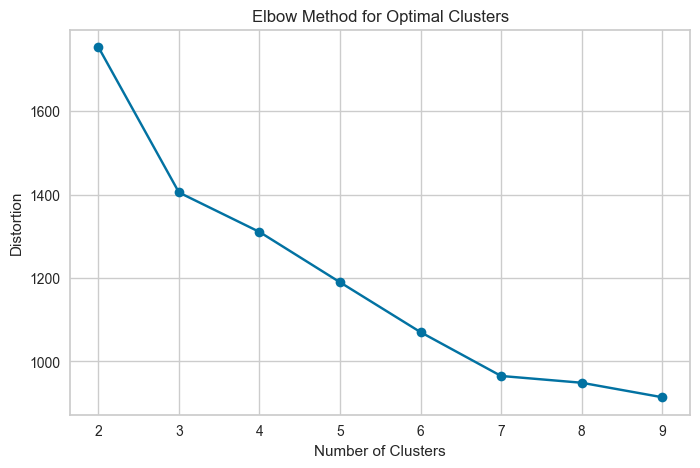

In [30]:
distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_attributes)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

From the Elbow plot we can see a **clear kink in 3**. There is also in 7, but for us is too high and even can lead to overfitting.

Furthermore, we use the **Silhouette plot** to check if this number of cluster persist or we have another optimal value:

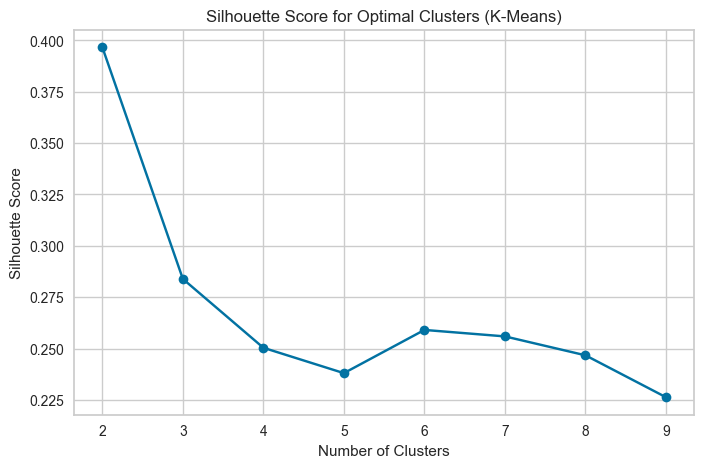

In [31]:
K = range(2, 10)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_attributes)
    score = silhouette_score(df_attributes, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.39998291897311333
For n_clusters = 3 The average silhouette_score is : 0.320469496567752
For n_clusters = 4 The average silhouette_score is : 0.2978862887374465
For n_clusters = 5 The average silhouette_score is : 0.2533573474910317


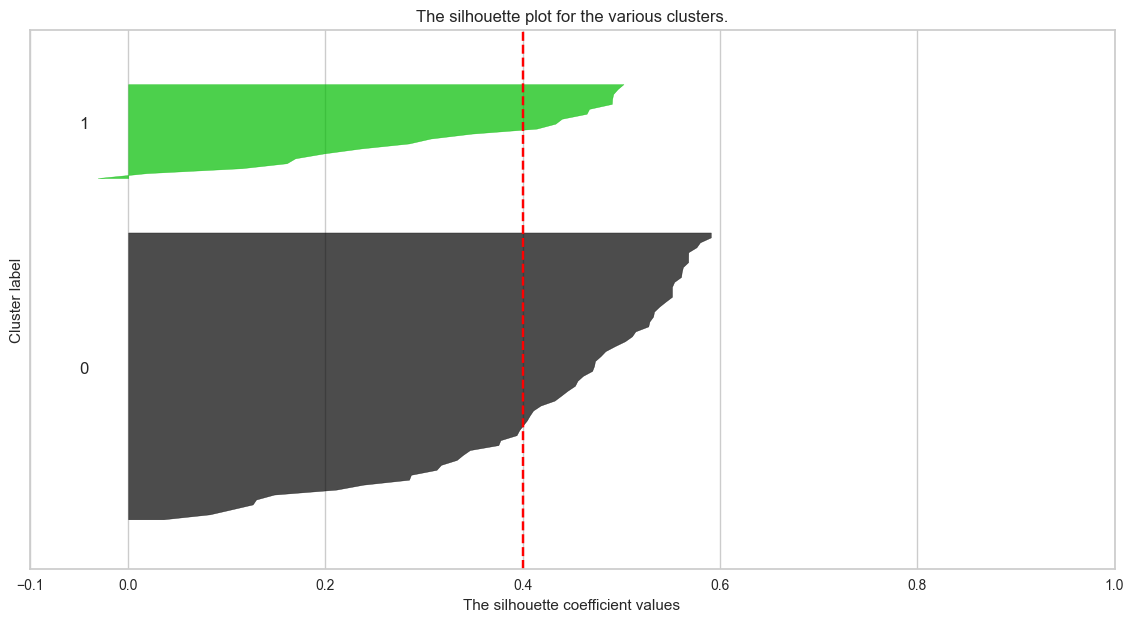

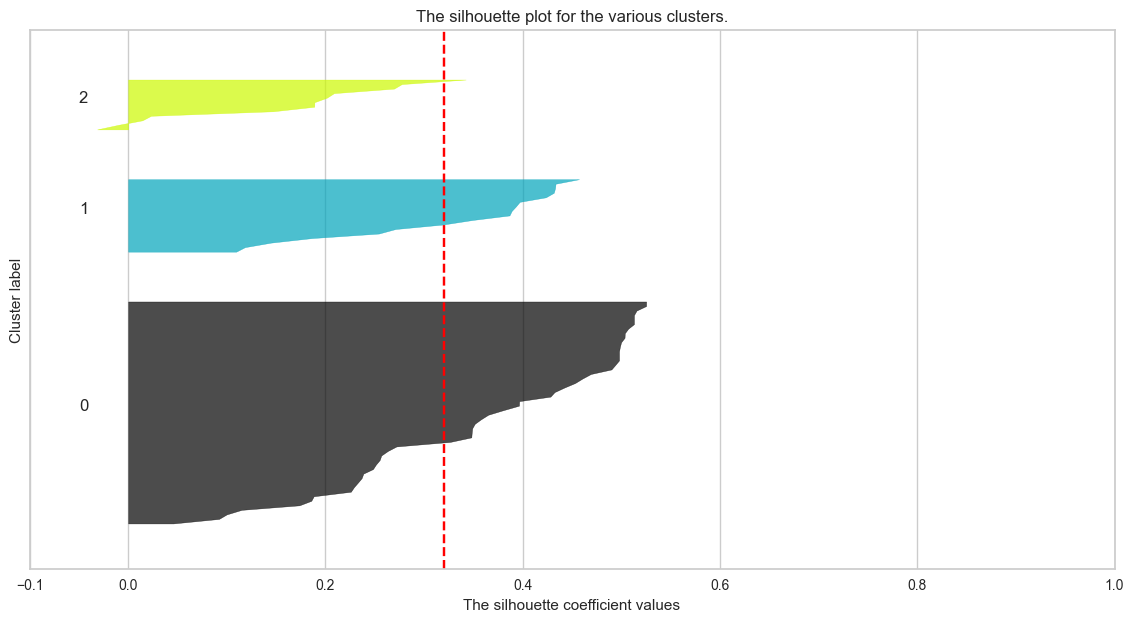

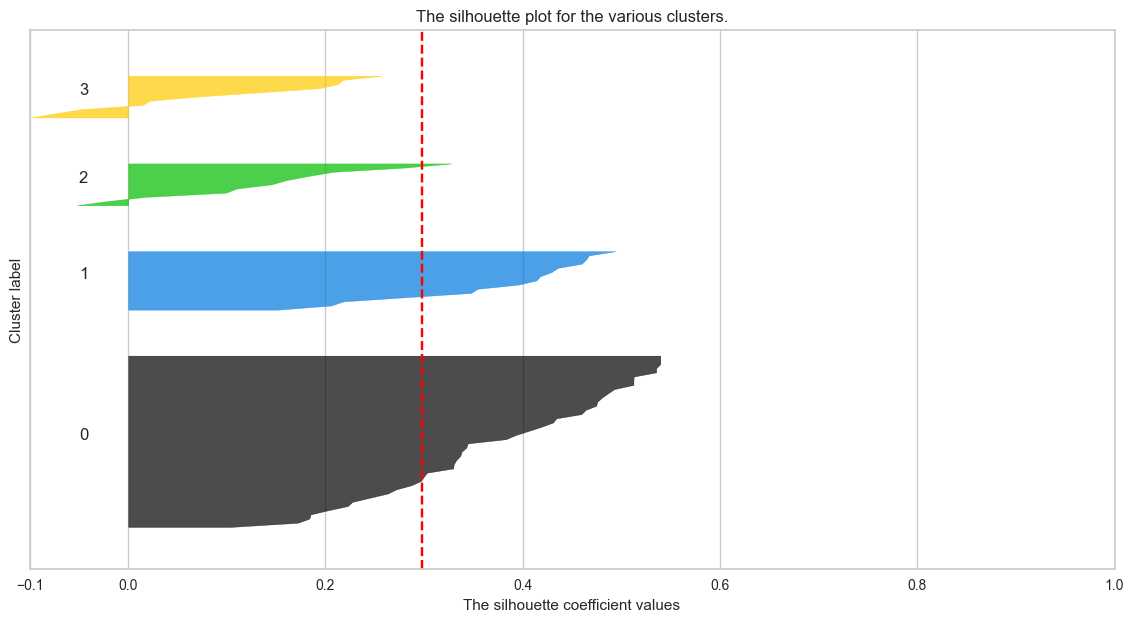

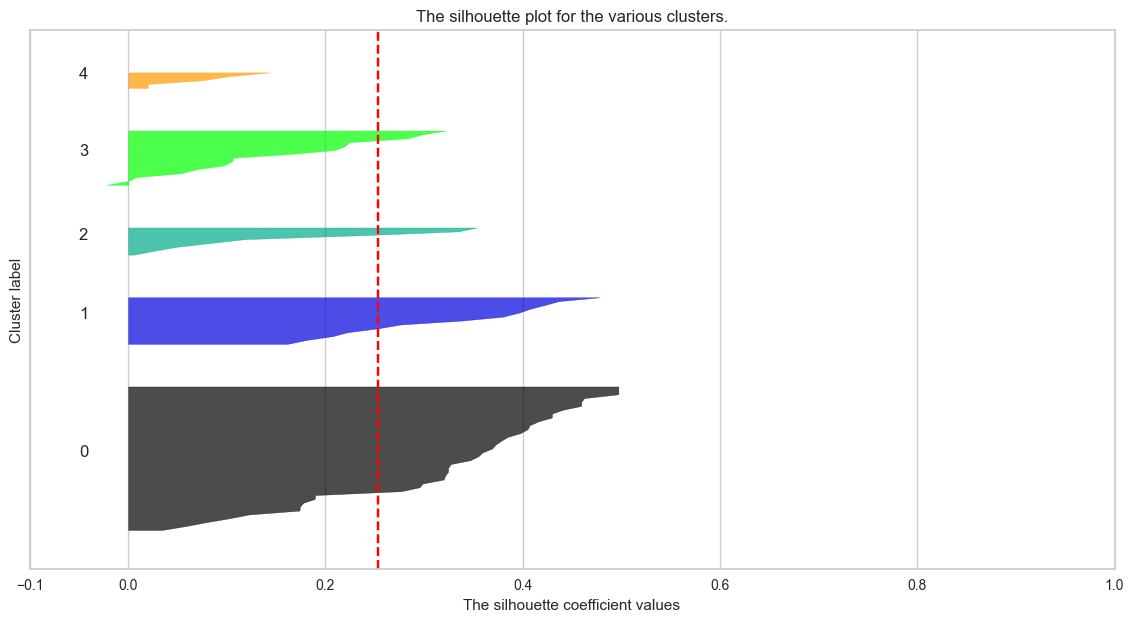

In [32]:
X = df_attributes.to_numpy()
range_n_clusters = [2, 3, 4, 5]

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 7)

    # Silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for the various clusters.")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

From this Silhouette plot we **don't have a clear peack**, although **k=2** is the highest value.

Finally, as we have **k=3 from Elbow method**, and **k=2 from Silhouette method**, we will finally use **DBI (Davies–Bouldin index)** to determine which one is a better cluster. The index is improved (lowered) by increased separation between clusters and decreased variation within clusters.

In [33]:
optimal_k = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for k in optimal_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_attributes)
    
    db_index = davies_bouldin_score(df_attributes, cluster_labels)
    print(f"Davies-Bouldin Index for k={k}: {db_index}")

Davies-Bouldin Index for k=2: 1.0680165713457712
Davies-Bouldin Index for k=3: 1.4301099843395964
Davies-Bouldin Index for k=4: 1.7869433398290706
Davies-Bouldin Index for k=5: 1.5844140720233557
Davies-Bouldin Index for k=6: 1.427585068752802
Davies-Bouldin Index for k=7: 1.312816281226792
Davies-Bouldin Index for k=8: 1.6196663113028733
Davies-Bouldin Index for k=9: 1.4945143411208333
Davies-Bouldin Index for k=10: 1.3989623538951823


From the DBI analysis, we can determine that **k=2 is the optimal number of clusters for our project**.

## K-Means (2 segments)

Perform clustering with K=2 and add cluster labels back to dataset and show first 5 rows.

In [34]:
df_attributes["SegmentKM"] = KMeans(n_clusters=2,random_state=42).fit(df_attributes).labels_
df_attributes["SegmentKM"] = df_attributes["SegmentKM"] + 1
df_attributes.head(5)

C:\Users\franc\AppData\Local\Temp\ipykernel_14436\1297209436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attributes["SegmentKM"] = KMeans(n_clusters=2,random_state=42).fit(df_attributes).labels_
C:\Users\franc\AppData\Local\Temp\ipykernel_14436\1297209436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attributes["SegmentKM"] = df_attributes["SegmentKM"] + 1


attr_public_transport  attr_prices  attr_accommodation  attr_food  \
0                      7            3                   6          4   
1                      5            3                   4          1   
2                      7            4                   3          1   
3                      6            8                   1          7   
4                      2            3                   4          1   

   attr_history  attr_events  attr_landscape  attr_tourist_packs  SegmentKM  
0             2            5               1                   8          2  
1             7            6               2                   8          2  
2             5            6               2                   8          2  
3             5            4               3                   2          1  
4             6            8               5                   7          2

**Segment sizes:**

In [35]:
df_attributes_sizes = pd.DataFrame(df_attributes.groupby("SegmentKM").size(),columns=["Size"]).T
df_attributes_sizes.insert(0,"Population",len(df_attributes))
df_attributes_sizes.loc["%"] = df_attributes_sizes.iloc[0].div(df_attributes_sizes.iloc[0,0]).mul(100).astype(int)
df_attributes_sizes

SegmentKM  Population   1   2
Size               79  19  60
%                 100  24  75

## Segments description


**Means of segmentation variables by segment:**


In [36]:
df_attributes_Means = df_attributes.groupby("SegmentKM").mean().T
df_attributes_Means.insert(0,"Population",df_attributes.drop(columns="SegmentKM").mean())
df_attributes_Means.round(2)

SegmentKM              Population     1     2
attr_public_transport        3.90  5.63  3.35
attr_prices                  3.33  6.00  2.48
attr_accommodation           3.90  6.16  3.18
attr_food                    3.87  5.21  3.45
attr_history                 4.46  3.79  4.67
attr_events                  5.49  2.84  6.33
attr_landscape               4.95  4.53  5.08
attr_tourist_packs           6.10  1.84  7.45

**Significance of means differences between each segment and the rest of the population:**


In [37]:
from scipy import stats
#from statsmodels.stats import weightstats as st

X = df_attributes.copy()

def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)
    
    segment = X[X.SegmentKM == col.name]
    rest_pop = X[X.SegmentKM != col.name]
    
    colors = []
    for var_name, var_segment_mean in col.items():
        t_test, p_value = stats.ttest_ind(segment[var_name], rest_pop[var_name],equal_var=False)
        #_,p_value,_ = st.ttest_ind(segment[var_name],rest_pop[var_name],usevar="unequal")    
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop[var_name].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop[var_name].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

df_attributes_Means.style.apply(style_cols).format("{:.2f}")

## Segmentation space using PCA (with pca package)


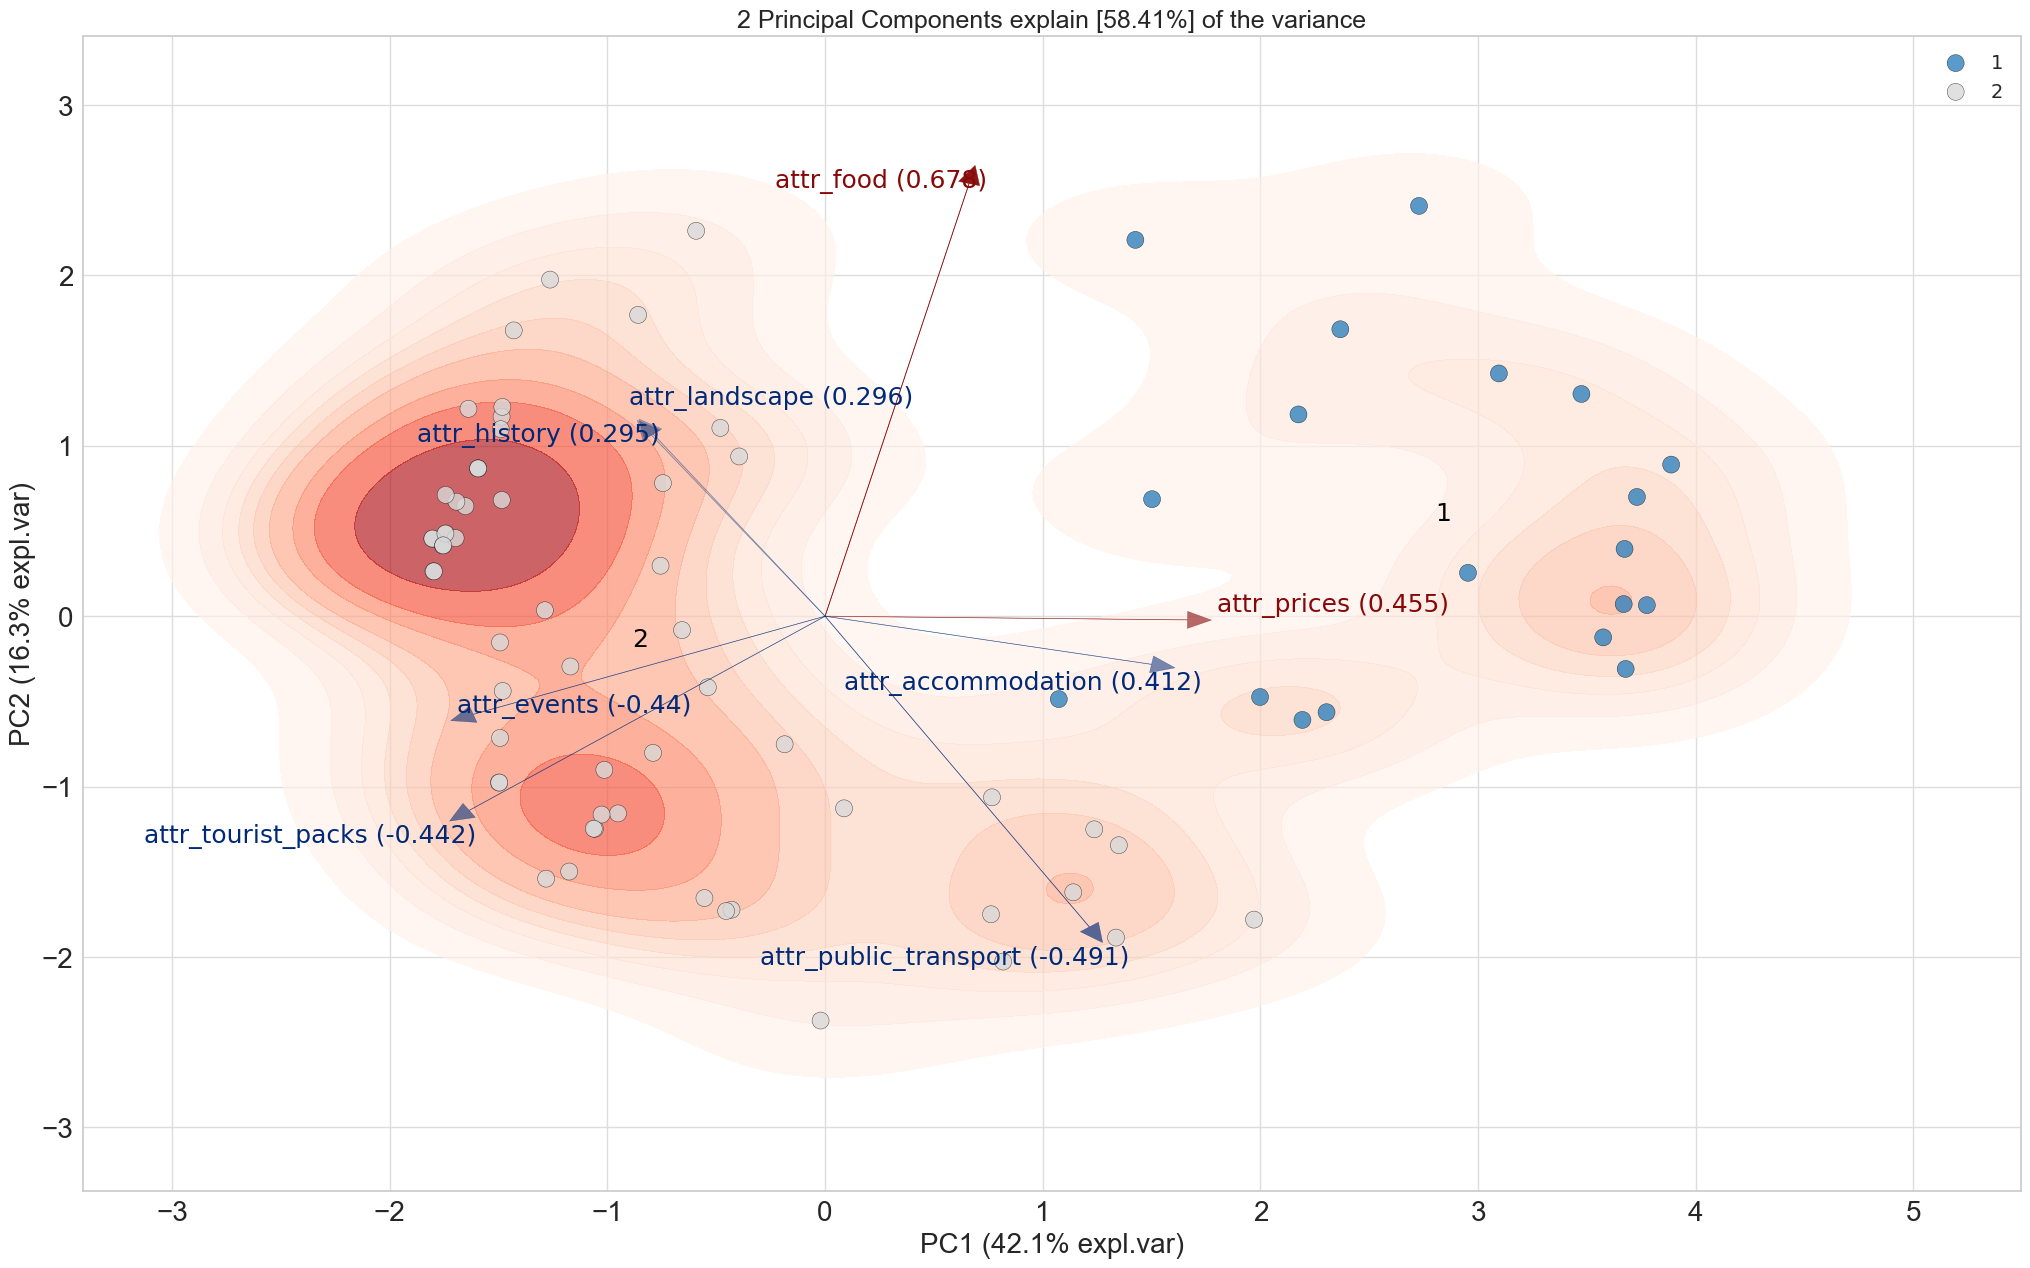

In [38]:
import logging, sys
logging.disable(sys.maxsize)

from pca import pca
model = pca(n_components=2,normalize=True)

features = df_attributes.drop(columns="SegmentKM")
segments = df_attributes.SegmentKM

# Fit transform
results = model.fit_transform(features,verbose=False)
# Make biplot with the number of features
# Strenght of the loadings are shown in two colors (red=strong, blue=weak)
fig, ax = model.biplot(labels=segments,verbose=0,density=True);

## Descriptor Analysis


First we obtain the **dataset of descriptors (excluding attributes)**.

In [39]:
df_descriptor = df_ascoli[['age_group', 'gender', 'touristic_travel_freq', 'weekend_distance',
                           'historic_importance', 'restaurant_reviews_importance', 'food_activities_interest', 'week_trip_budget',
                           'discount_importance', 'guided_tours_importance', 'offseason_interest', 'max_transport', 'travel_purpose_Business',
                           'travel_purpose_Education', 'travel_purpose_I don’t travel', 'travel_purpose_Tourism',
                           'travel_purpose_Visiting family/friends',
                           "trip_org_I don't go abroad and when traveling inside my country, I go with my family, and they do all the things.",
                           'trip_org_I plan and book everything myself',
                           'trip_org_Internet recommendations and blogs',
                           'trip_org_No organization whatsoever',
                           'trip_org_Relying on recommendations from friends/family',
                           'trip_org_Through a travel agency or tour operator',
                           'traveler_type_Couple Traveler', 'traveler_type_Family Traveler',
                           'traveler_type_Group Traveler', 'traveler_type_Solo Traveler',
                           "trip_ideas_source_Again, I do not travel abroad, but if I were to I'd use all the above.",
                           'trip_ideas_source_Chat gpt', 'trip_ideas_source_Magazines or books',
                           'trip_ideas_source_My own bucket list or usually depends upon the transport cost',
                           'trip_ideas_source_Online travel platforms (e.g., TripAdvisor, Booking.com, Expedia)',
                           'trip_ideas_source_Random Places, Historic or with something that is appealing at a ceratin time or mood.',
                           'trip_ideas_source_Recommendations from friends or family',
                           'trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)',
                           'trip_ideas_source_TV shows, movies, or documentaries',
                           'trip_ideas_source_Travel agencies or brochures',
                           'trip_ideas_source_Travel blogs or websites', 'arch_interest_Bridges',
                           'arch_interest_Castles and fortifications', 'arch_interest_Ports',
                           'arch_interest_Public squares', 'arch_interest_Religious sites']]

In [40]:
df_descriptor.head(5)

age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  week_trip_budget  discount_importance  \
0                         1              3000                    4   
1                         1              1250                    4   
2                         1              1250                    2   
3                         0              3000                    3   
4                         1              1250                    5   

   guided_tours_importance  ...  \
0                        3  ...   
1                        3  ...   
2                        2  ...   
3                        2  ...   
4                        4  ...   

   trip_ideas_source_Recommendations from friends or family  \
0                                                  1          
1                                                  1          
2                                                  0          
3                                                  0          
4                                                  1          

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  
0                             1                              0  
1                             1                              0  
2                             1           

Add **segment labels**:

In [41]:
df_descriptor["SegmentKM"] = df_attributes["SegmentKM"]
print("DataFrame: df_descriptor (with 'SegmentKM' column added)")
df_descriptor.head(5)

DataFrame: df_descriptor (with 'SegmentKM' column added)


C:\Users\franc\AppData\Local\Temp\ipykernel_14436\2242582482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descriptor["SegmentKM"] = df_attributes["SegmentKM"]


age_group  gender  touristic_travel_freq  weekend_distance  \
0          2       1                      1               200   
1          3       1                      5               400   
2          2       0                      2               400   
3          3       1                      0               200   
4          3       0                      3               200   

   historic_importance  restaurant_reviews_importance  \
0                    3                              2   
1                    3                              5   
2                    4                              3   
3                    5                              5   
4                    4                              4   

   food_activities_interest  week_trip_budget  discount_importance  \
0                         1              3000                    4   
1                         1              1250                    4   
2                         1              1250                    2   
3                         0              3000                    3   
4                         1              1250                    5   

   guided_tours_importance  ...  \
0                        3  ...   
1                        3  ...   
2                        2  ...   
3                        2  ...   
4                        4  ...   

   trip_ideas_source_Social media platforms (e.g., Instagram, TikTok, Pinterest)  \
0                                                  1                               
1                                                  1                               
2                                                  1                               
3                                                  1                               
4                                                  1                               

   trip_ideas_source_TV shows, movies, or documentaries  \
0                                                  0      
1                                                  0      
2                                                  1      
3                                                  0      
4                                                  0      

   trip_ideas_source_Travel agencies or brochures  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   trip_ideas_source_Travel blogs or websites  arch_interest_Bridges  \
0                                           1                      1   
1                                           1                      0   
2                                           0                      0   
3                                           1                      1   
4                                           1                      1   

   arch_interest_Castles and fortifications  arch_interest_Ports  \
0                                         1                    0   
1                                         1                    1   
2                                         0                    0   
3                                         0                    0   
4                                         1                    0   

   arch_interest_Public squares  arch_interest_Religious sites  SegmentKM  
0                             1                              0          2  
1                             1                              0          2  
2                             1                              1          2  
3                             0                              0          1  
4                             1                              1          2  

[5 rows x 44 columns]

As we had **some trouble selecting important descriptors**, and we don't want to exclude any significant descriptor, we will first run a **Random Forest** to determine main descriptors:

In [42]:
from sklearn.ensemble import RandomForestClassifier

X = df_descriptor.drop(columns="SegmentKM")
y = df_descriptor.SegmentKM

rf = RandomForestClassifier(n_estimators = 30,random_state = 42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=30, random_state=42)

In [43]:
importances = pd.DataFrame([rf.feature_importances_], columns=X.columns, index=["Importance"])
importances = importances.T  # Transpose for better readability
importances = importances.sort_values(by="Importance", ascending=False)  # Sort descending
print(importances.round(2))

                                                    Importance
restaurant_reviews_importance                             0.09
weekend_distance                                          0.08
guided_tours_importance                                   0.07
week_trip_budget                                          0.06
touristic_travel_freq                                     0.05
historic_importance                                       0.05
trip_org_Through a travel agency or tour operator         0.04
discount_importance                                       0.04
arch_interest_Ports                                       0.04
age_group                                                 0.03
traveler_type_Family Traveler                             0.03
max_transport                                             0.03
gender                                                    0.03
arch_interest_Bridges                                     0.03
arch_interest_Religious sites                          

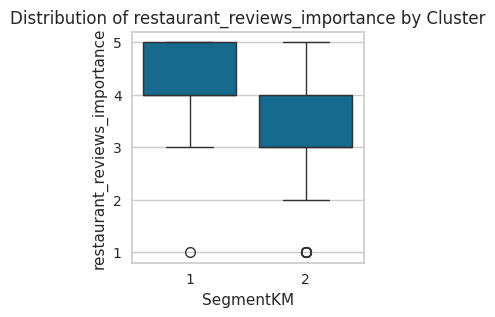

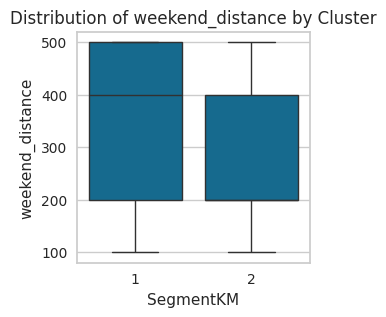

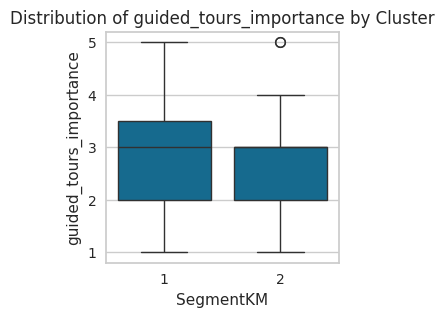

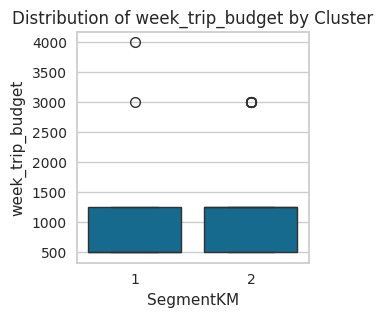

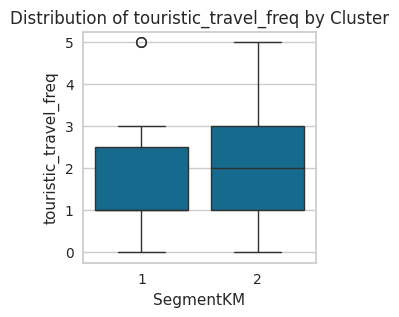

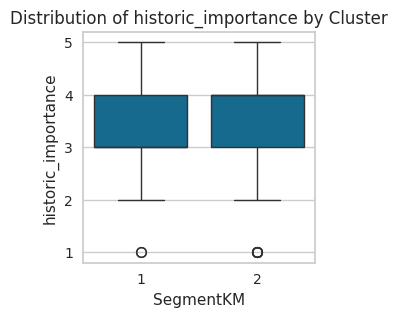

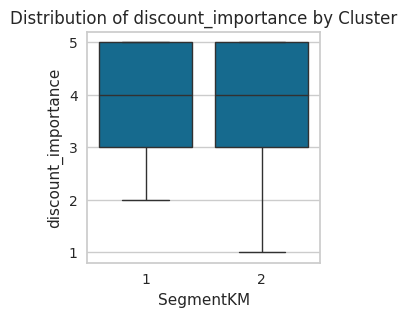

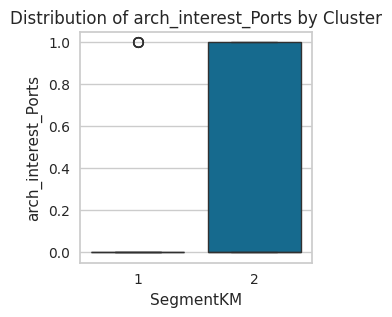

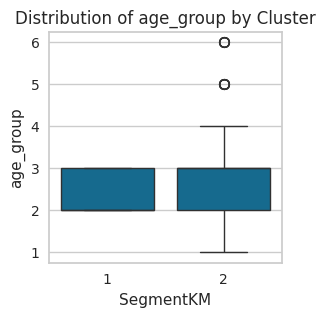

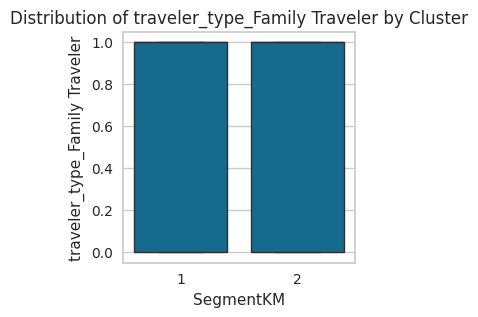

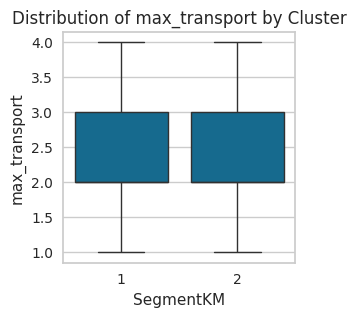

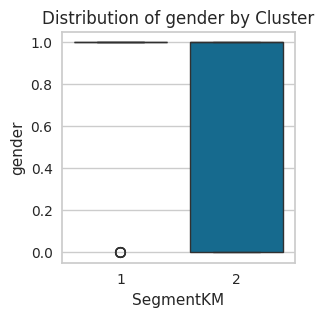

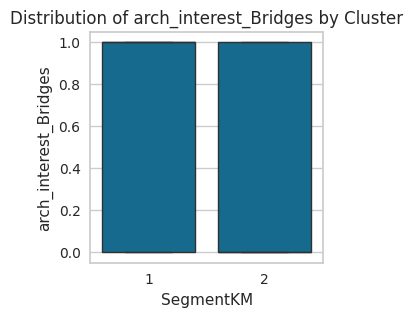

In [44]:
for col in ['restaurant_reviews_importance', 'weekend_distance', 'guided_tours_importance',
                                   'week_trip_budget', 'touristic_travel_freq', 'historic_importance', 'discount_importance',
                                       'arch_interest_Ports', 'age_group', 'traveler_type_Family Traveler', 'max_transport',
                                       'gender', 'arch_interest_Bridges']:
    plt.figure(figsize=(3, 3))
    sns.boxplot(x="SegmentKM", y=col, data=df_descriptor)
    plt.title(f"Distribution of {col} by Cluster")
    plt.show()

We will just keep those equal or above 0,03, but also removing those descriptors that do not discriminate clusters well (from box plots):
- "trip_org_Through a travel agency or tour operator" as could be included in the original attribute of touristic agencies."
- "guided_tours_importance": apart from not discriminating clearly the two clusters, also can be explained in some way by attribute "tourist packs"
- "week_trip_budget": does not discriminate clusters, even box plot are identical.
- "historic_importance": doesn't discriminates well clusters, and is already explained by attribute history.
- "discount_importance": doesn't discriminate clear the clusters, and make ssense as it is a question that everyone prefers (discounts).
- "traveler_type_Family Traveler": doesn't discriminate clear the clusters.
- "max_transport": doesn't discriminate clear the clusters and also can be included in attribute "transportation".
- "arch_interest_Bridges": doesn't discriminate clear the clusters.

Special cases:
- "age": although is not so good for cluster discrimination, we consider it an important descriptor.
- "arch_interest_Ports": although seems important and discriminates clusters, we excluded this because without it cumulative variance of PCA improved and we consider it not important for describing clusters as we already removed all questions similar or related to it.

In [45]:
df_descriptor_filtered = df_descriptor[['age_group', 'gender', 'restaurant_reviews_importance', 'weekend_distance', 'touristic_travel_freq', 'SegmentKM']]

In [46]:
X = df_descriptor_filtered.drop(columns="SegmentKM")
y = df_descriptor_filtered.SegmentKM

rf = RandomForestClassifier(n_estimators = 30,random_state = 42)
rf.fit(X, y)

RandomForestClassifier(n_estimators=30, random_state=42)

In [47]:
importances = pd.DataFrame([rf.feature_importances_],columns=X.columns,index=["Importance"])
importances.round(2)

age_group  gender  restaurant_reviews_importance  \
Importance       0.13    0.15                           0.27   

            weekend_distance  touristic_travel_freq  
Importance              0.23                   0.23

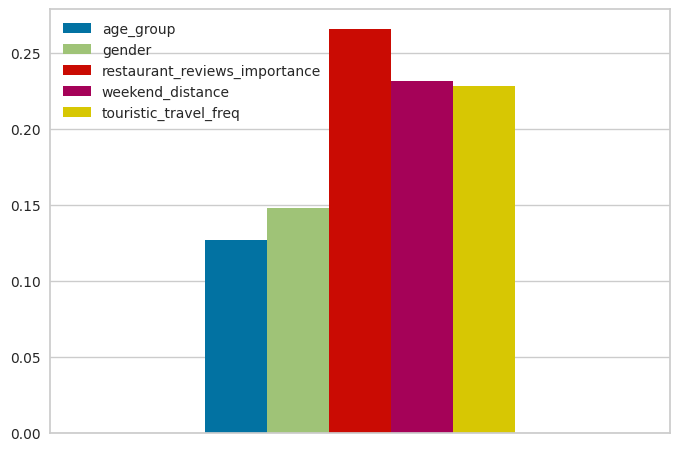

In [48]:
importances.plot.bar(xticks=[]);

### Segments description


Means of descriptor variables by segment:

In [49]:
df_descriptor_filtered_Means = df_descriptor_filtered.groupby("SegmentKM").mean().T
df_descriptor_filtered_Means.insert(0,"Population",df_descriptor.drop(columns="SegmentKM").mean())
df_descriptor_filtered_Means.round(1)

SegmentKM                      Population      1      2
age_group                             2.8    2.4    2.9
gender                                0.7    0.8    0.6
restaurant_reviews_importance         3.5    4.2    3.3
weekend_distance                    286.1  331.6  271.7
touristic_travel_freq                 2.1    1.8    2.1

Significance of means differences:

In [50]:
def style_cols(col):
    if col.name == "Population": return ["background-color: white"]*len(col)
    
    segment_data = df_descriptor_filtered[df_descriptor_filtered["SegmentKM"] == col.name]
    rest_pop_data = df_descriptor_filtered[df_descriptor_filtered["SegmentKM"] != col.name]
    
    colors = []
    for var, var_segment_mean in col.items():
        _, p_value = stats.ttest_ind(segment_data[var], rest_pop_data[var],equal_var=False)
        if p_value < 0.05:
            color = "background-color: green" if var_segment_mean > rest_pop_data[var].mean() else "background-color: red"
        elif p_value < 0.1:
            color = "background-color: #90ee90" if var_segment_mean > rest_pop_data[var].mean() else "background-color: #f1807e"
        else: color = "background-color: white"
        colors.append(color)
    return colors

df_descriptor_filtered_Means.style.apply(style_cols).format("{:.1f}")

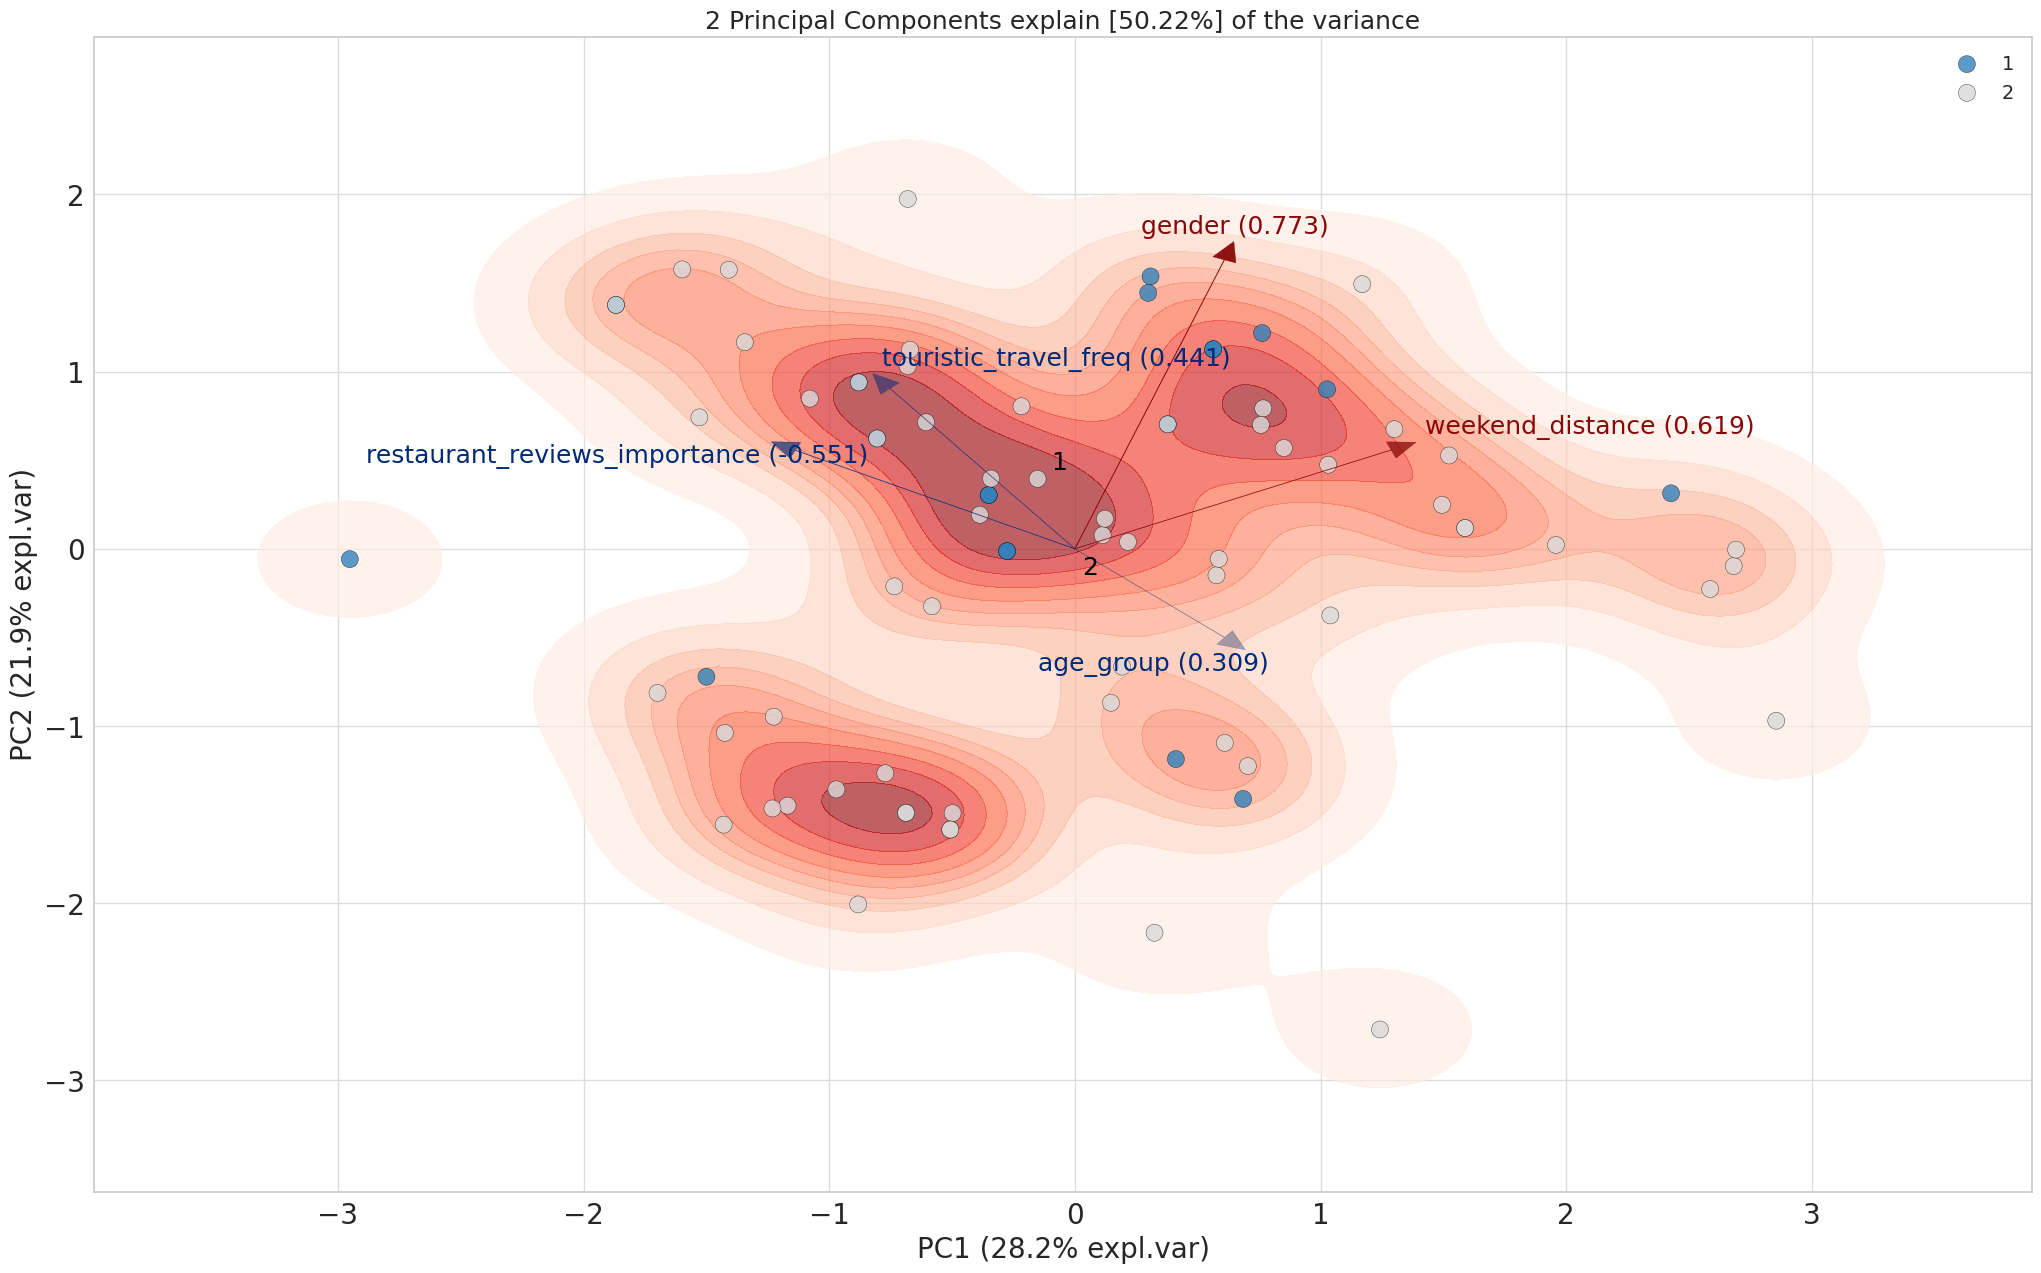

In [51]:
logging.disable(sys.maxsize)

#https://erdogant.github.io/pca
from pca import pca
model = pca(n_components=2,normalize=True)

features = df_descriptor_filtered.drop(columns="SegmentKM")
segments = df_descriptor_filtered.SegmentKM

# Fit transform
results = model.fit_transform(features,verbose=False)
# Make biplot with the number of features
# Strenght of the loadings are shown in two colors (red=strong, blue=weak)
fig, ax = model.biplot(labels=segments,verbose=0,density=True);

# Predictive Model

Classification using Multinomial Logit model (from statsmodel package)


In [52]:
import statsmodels.formula.api as smf

smf.mnlogit(formula="SegmentKM ~ age_group + gender + restaurant_reviews_importance + weekend_distance + touristic_travel_freq",
            data=df_descriptor_filtered).fit().summary()

Optimization terminated successfully.
         Current function value: 0.425147
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:              SegmentKM   No. Observations:                   79
Model:                        MNLogit   Df Residuals:                       73
Method:                           MLE   Df Model:                            5
Date:                Mon, 03 Feb 2025   Pseudo R-squ.:                  0.2293
Time:                        11:54:23   Log-Likelihood:                -33.587
converged:                       True   LL-Null:                       -43.581
Covariance Type:            nonrobust   LLR p-value:                  0.001255
=================================================================================================
                  SegmentKM=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.9165      1.809      2.165      0.030       0.371       7.462
age_group                         0.7895      0.450      1.753      0.080      -0.093       1.672
gender                           -0.5604      0.699     -0.802      0.422      -1.930       0.809
restaurant_reviews_importance    -0.8966      0.310     -2.890      0.004      -1.505      -0.289
weekend_distance                 -0.0047      0.002     -1.984      0.047      -0.009   -5.58e-05
touristic_travel_freq             0.1855      0.219      0.848      0.396      -0.243       0.614
=================================================================================================
"""

Optimization terminated successfully.
         Current function value: 0.425147
         Iterations 7


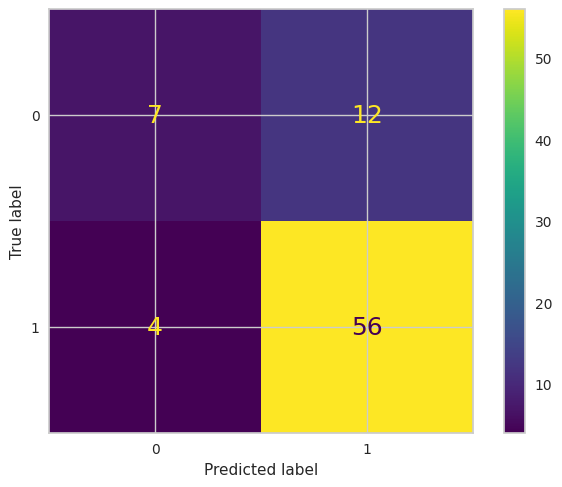

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

PredTable = smf.mnlogit(formula="SegmentKM ~ age_group + gender + restaurant_reviews_importance + weekend_distance + touristic_travel_freq",
                        data=df_descriptor_filtered).fit().pred_table()

ConfusionMatrixDisplay(confusion_matrix=PredTable).plot();

# Final conclusion

After all done, we considered that the **clustering result was appropiate** and **k=2** clusters was the **best option** for the project.

Nevertheless, when trying to use **descriptive variables** for describing each cluster, the **results were not as good as expected**, having some overlapping between clusters, and some variables that do not discriminate clusters correctly. Although we did some variable removal, the model outputed a **good prediciton accuracy of 79,7%** and a **loss function value of 42,5%**.We can see that the **model can still improve**.

This said, we consider that **attributes are well selected**, although a further analysis could be done to determine if it can be improved with other attributes.

On the other hand, we highly recommend **improving the descriptive variables**, and improve **model to do a good prediction** with them. Probably some variables that could have been better and improve the model are: **income, professional status, marital status, family composition, among others**.

# Descriptors' Analysis for each Cluster

In [54]:
n_respondents = df_descriptor_filtered[['age_group', 'SegmentKM']].groupby('SegmentKM').count()
n_respondents = n_respondents.rename(columns={'age_group': 'Count'})
n_respondents['Size'] = round(n_respondents['Count']/n_respondents['Count'].sum()*100,2)
n_respondents

Count   Size
SegmentKM              
1             19  24.05
2             60  75.95

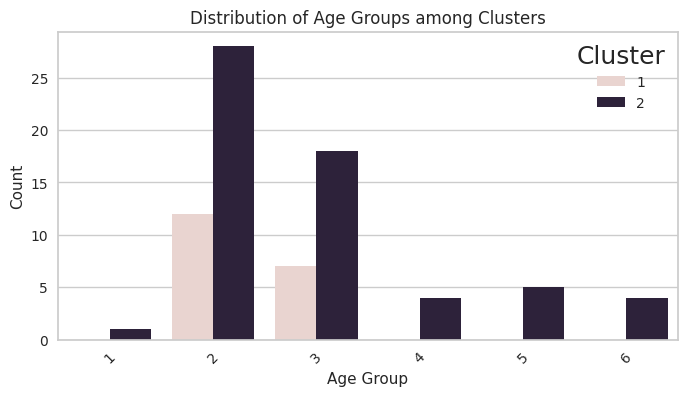

In [55]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='age_group', hue='SegmentKM')
plt.title('Distribution of Age Groups among Clusters')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

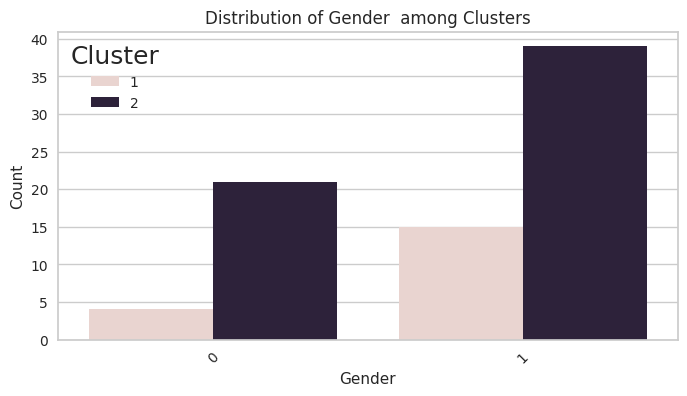

In [56]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='gender', hue='SegmentKM')
plt.title('Distribution of Gender  among Clusters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

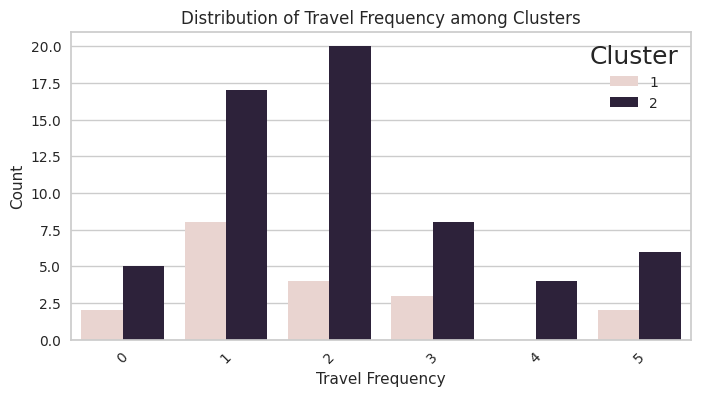

In [57]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='touristic_travel_freq', hue='SegmentKM')
plt.title('Distribution of Travel Frequency among Clusters')
plt.xlabel('Travel Frequency')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

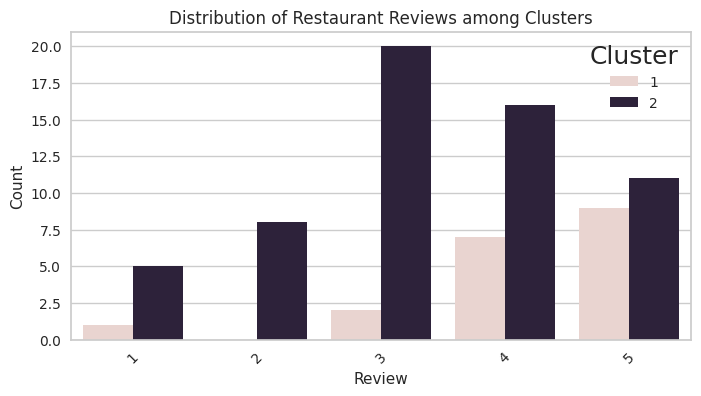

In [58]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='restaurant_reviews_importance', hue='SegmentKM')
plt.title('Distribution of Restaurant Reviews among Clusters')
plt.xlabel('Review')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

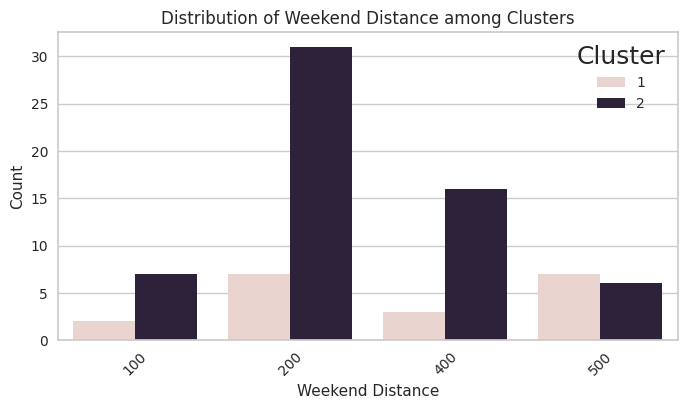

In [59]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_descriptor_filtered, x='weekend_distance', hue='SegmentKM')
plt.title('Distribution of Weekend Distance among Clusters')
plt.xlabel('Weekend Distance')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.xticks(rotation=45)
plt.show()

## Means of Attributes Across Clusters + Attribute Importance in each Cluster

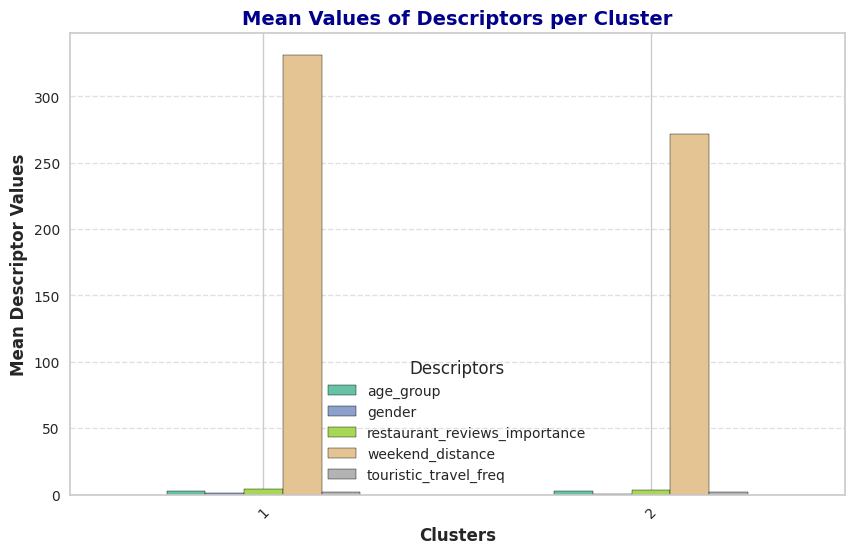

In [60]:
descriptors = ['age_group', 'gender', 'restaurant_reviews_importance', 'weekend_distance', 'touristic_travel_freq']

# Compute mean
mean_values = df_descriptor_filtered.groupby("SegmentKM")[descriptors].mean()

# Plot 
fig, ax = plt.subplots(figsize=(10, 6))
mean_values.plot(kind='bar', colormap="Set2", ax=ax, edgecolor='black')

ax.set_xlabel("Clusters", fontsize=12, fontweight='bold')
ax.set_ylabel("Mean Descriptor Values", fontsize=12, fontweight='bold')
ax.set_title("Mean Values of Descriptors per Cluster", fontsize=14, fontweight='bold', color='darkblue')

# Display legend
plt.legend(title="Descriptors", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Normalize cluster means for comparison
normalized_means = mean_values.div(mean_values.sum(axis=1), axis=0)

As we see a high value of weekend_distance, we will check the same plot without it, so we can have clear patterns for the other variables:

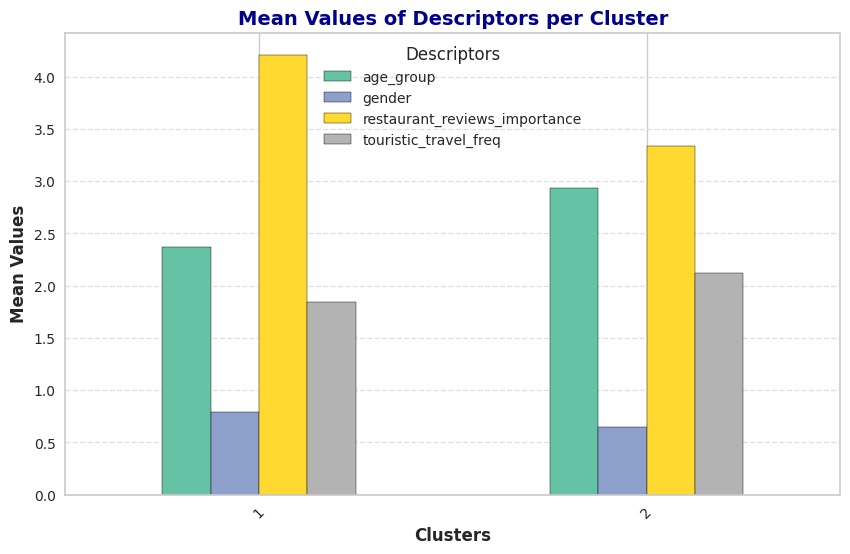

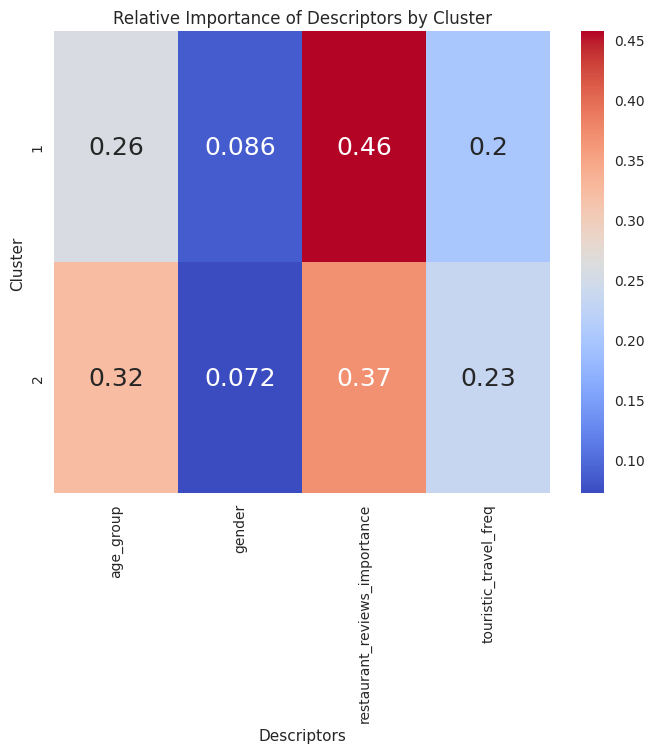

In [61]:
descriptors1 = ['age_group', 'gender', 'restaurant_reviews_importance', 'touristic_travel_freq']

# Compute mean
mean_values = df_descriptor_filtered.groupby("SegmentKM")[descriptors1].mean()

# Plot 
fig, ax = plt.subplots(figsize=(10, 6))
mean_values.plot(kind='bar', colormap="Set2", ax=ax, edgecolor='black')

ax.set_xlabel("Clusters", fontsize=12, fontweight='bold')
ax.set_ylabel("Mean Values", fontsize=12, fontweight='bold')
ax.set_title("Mean Values of Descriptors per Cluster", fontsize=14, fontweight='bold', color='darkblue')

# Display legend
plt.legend(title="Descriptors", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Normalize cluster means for comparison
normalized_means = mean_values.div(mean_values.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_means, annot=True, cmap='coolwarm', cbar=True)
plt.title('Relative Importance of Descriptors by Cluster')
plt.xlabel('Descriptors')
plt.ylabel('Cluster')
plt.show()

Let's refresh what the values represent, so we can understand the final values for each cluster:

* **age_group:** <18 = 1, 18-25 = 2, 26-35 = 3, 36-45 = 4, 46-55 = 5, >55 = 6.
* **gender:** male = 1, female = 0.
* **restaurant_reviews_importance:** values go from 1 to 5.
* **touristic_travel_freq:** go from 0 to 4, and 5 represents any number equal or higher than 5.
* **weekend_distance:** < 100 km (Approx. 1 hour or less by car) = 100, 100–300 km (Approx. 1.5 to 3 hours by car) = 200, 300–500 km (Approx. 3 to 5 hours by car) = 400, > 500 km ( > 5 hours by car) = 500.

**1. DIFFERENCE IN AGE GROUP:**
- Cluster 2 has a higher mean age group value than Cluster 1, suggesting that Cluster 2 might include older individuals on average.
- We can say that on average the **Cluster 1** contains respondents between **18 and 25 years old**, while **Cluster 2** contains respondents between **26 and 35 years old**. Also we must remember that Cluster 2 contains respondents older than 35 years old.

**2. GENDER DISTRIBUTION:** Both clusters have **more males than females** and when we compare the mean values we can confirm that there are no hughe differences.

**3. RESTAURANT REVIEW IMPORTANCE:**
- **Cluster 1 has a higher mean value** for restaurant review importance than the Cluster 2, indicating that it's a good variable to consider. This suggests that individuals in Cluster 1 are more likely to **rely on reviews when deciding on dining options**.
- When checking frequency by value given in the review, we can see that **Cluster 2** also have some high values for this variable, but there were more respondents answering 3, while **Cluster 1** has more values like 4 or 5.

**4. FREQUENCY OF TURISTIC TRAVEL:** **Cluster 2** shows a **higher mean value** for this variable. When looking to the frequency count we can conclude that most respondents in **Cluster 2** tend to travel **2 times a year**, while **Cluster 1** has more respondents that **travel once a year**.

**5. WEEKEND DISTANCE:** We can see that **Cluster 2** tend to prefer less distance for traveling, having a lower mean value and having more respondents preferring to **travel at most between 100 and 300 km for a weekend**. On the other hand, **Cluster 1** has no clear preference, although we can say that we have **some respondents that coincide with that majority in cluster 2**, while other respondents **would travel more than 500km** for a weekend trip.ng move.

# Final Clusters

### Cluster 1

Consists mainly of **_younger individuals_**, typically between **_18 and 25 years old_**. This group places **_greater importance on restaurant reviews_**, indicating that they are more likely to **_rely on others' opinions_** before deciding on dining options. While they do **_travel, they tend to do so less frequently:_**, with most respondents traveling only **_once a year for tourism_**. When it comes to weekend trips, there is no strong preference for travel distance, but **_some are willing to travel more than 500 km_**, suggesting a **_mix of both local and long-distance travelers_**.

**_STRATEGY:_** focusing on social media engagement, affordable travel options, and unique experiences. Partnering with influencers and travel bloggers on TikTok and Instagram can help highlighting exciting activities, while encouraging visitors to leave positive online reviews, increasing credibility. The city should promote budget-friendly hostels and student discounts as in general we are talking about young people. Creating weekend travel packages, mainly with neighbour cities, so they can visit more than one city in a weekend or week, providing diverse and exciting trips.

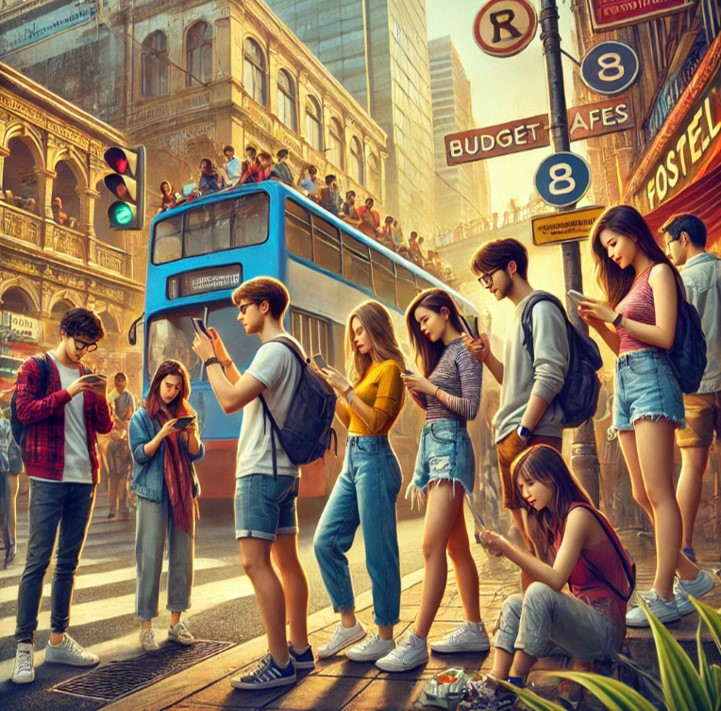

In [62]:
from IPython.display import display
from PIL import Image

img_path = "Cluster pictures/Cluster 1.jpg"
img = Image.open(img_path)
display(img)

### Cluster 2

Comprises an **_older demographic_**, primarily **_between 26 and 35 years old_**, though it also includes respondents over 35. Compared to Cluster 1, these individuals **_travel more frequently_**, with most respondents taking at least two tourist trips per year. They show less reliance on restaurant reviews when choosing dining options but still have a portion of respondents considering them. For weekend trips, **_they prefer shorter travel distances_**, with most choosing to travel **_between 100 and 300 km_**, indicating a tendency for nearby getaways rather than long-distance weekend travel.

**_STRATEGY:_** for this cluster is important to provide convenience, relaxation, and premium experiences. The city should aim for weekend getaway packages that include hotels, fine dining, and guided cultural tours. Given their preference for shorter distances, targeted campaigns should focus on regional visitors. Taking into account these, Ascoli Piceno should improve the accesibility to the city, so tourists can arrive from different parts of Italy and even the world. Partnerships with corporate offices and travel agencies can help, as in general they won't travel too much for a quick escape, so a whole Ascoli Piceno experience should be provided. Promoting wine tastings, historical attractions, and boutique accommodations will further appeal to this segment. Lastly, a loyalty program or exclusive weekend pass offering discounts for multiple visits will encourage repeat tourism and build long-term engagement with this group.

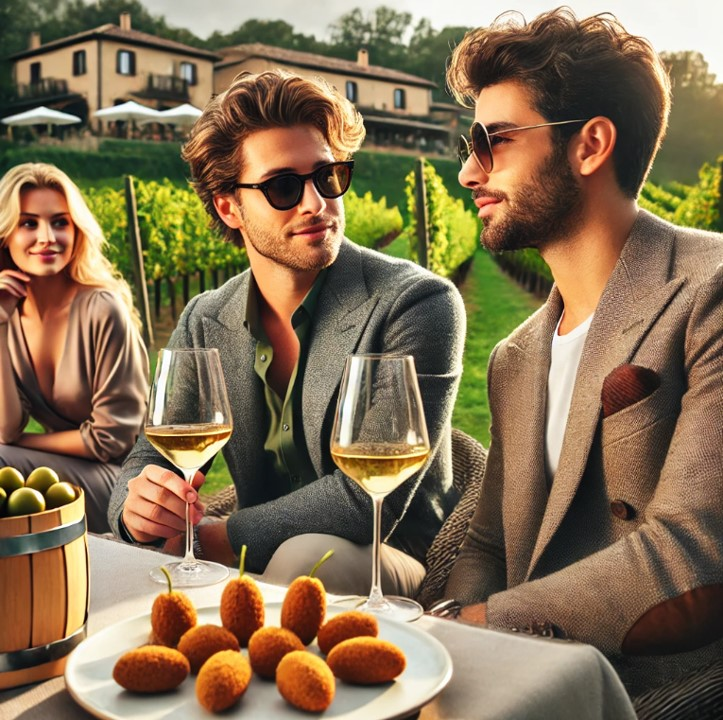

In [63]:
img2_path = "Cluster pictures/Cluster 2.jpg"
img2 = Image.open(img2_path)
display(img2)